In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

Files already downloaded and verified
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


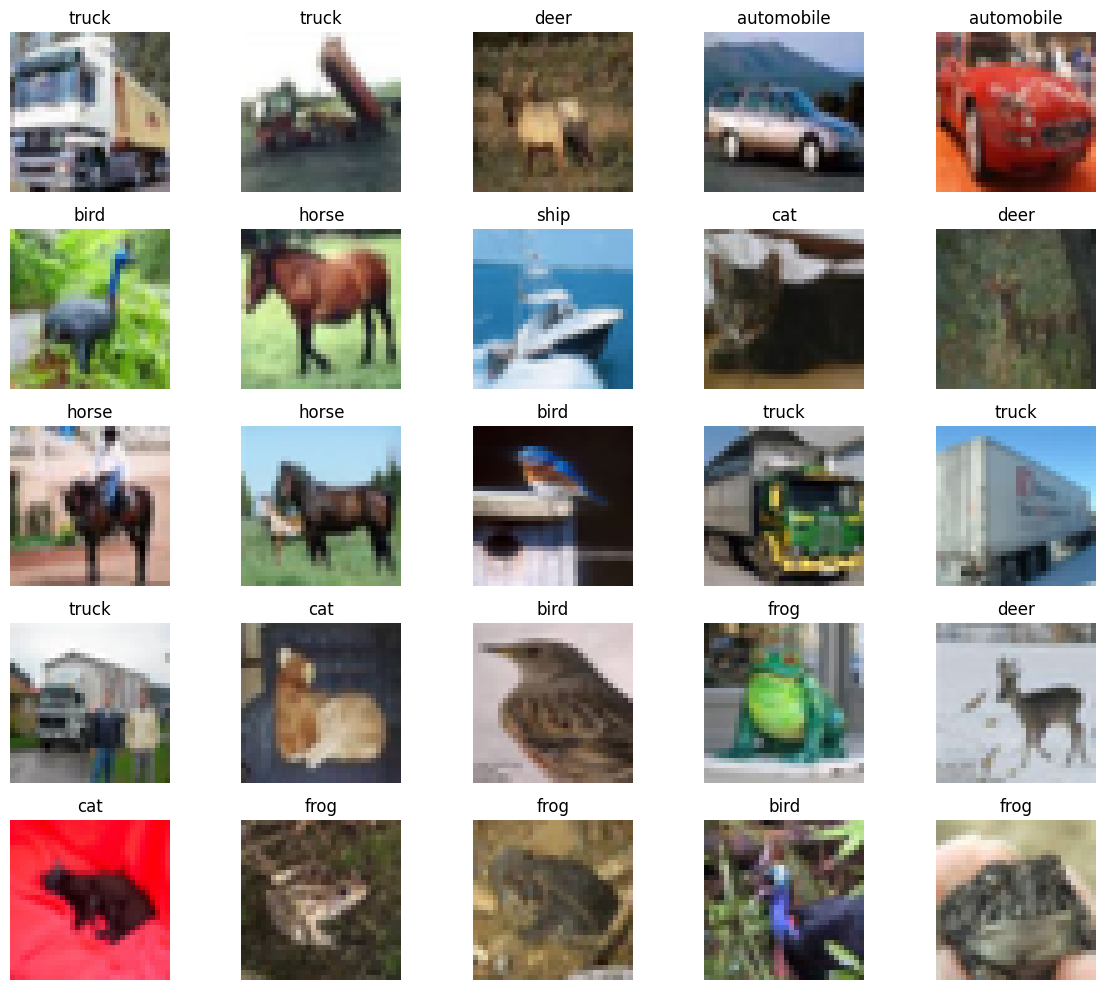

In [5]:
visualize_images(sample,(5,5))

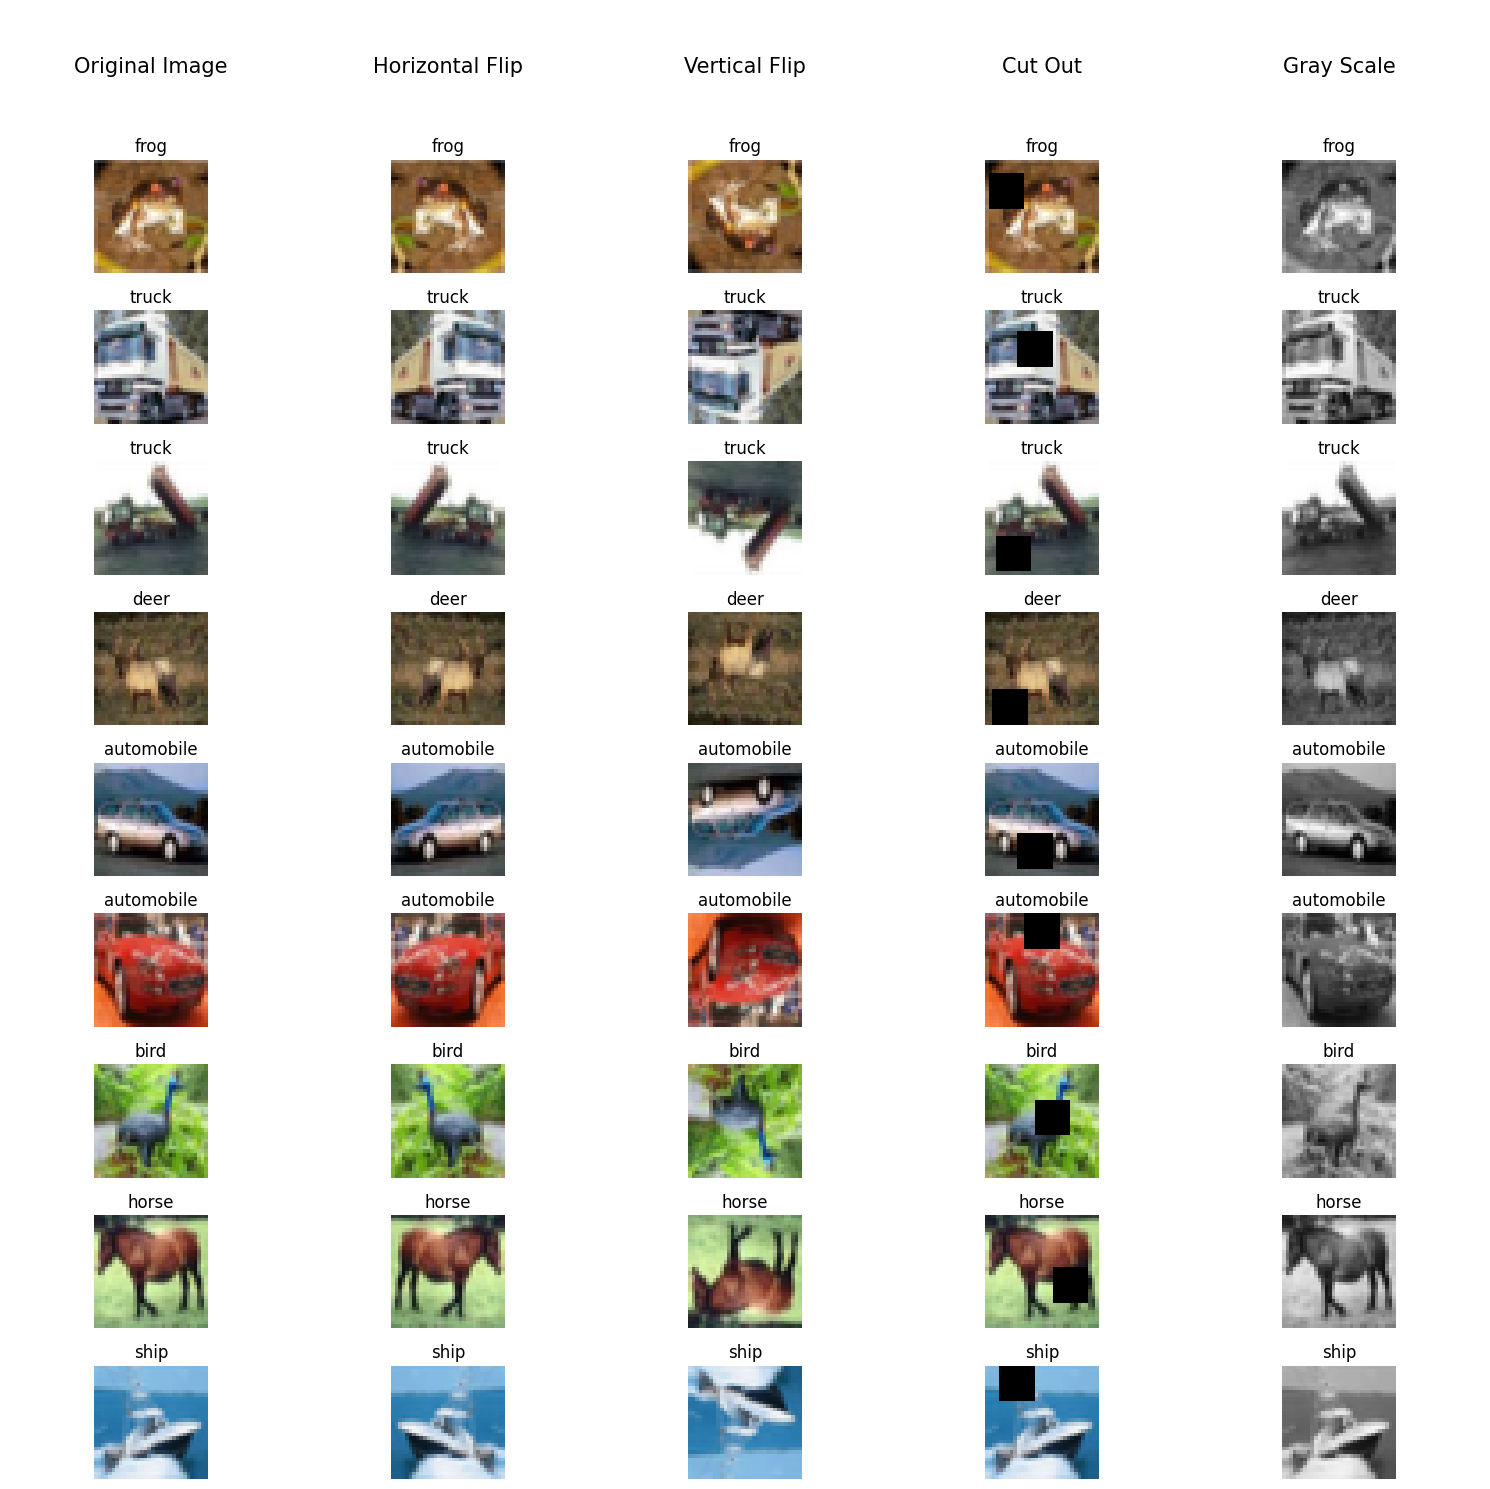

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=10, max_width=10, min_holes=1, min_height=10,
                               min_width=10, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=32,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=32,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(norm_type="ln").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
         GroupNorm-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           1,800
              ReLU-6           [-1, 20, 32, 32]               0
         GroupNorm-7           [-1, 20, 32, 32]              40
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 10, 34, 34]             200
             ReLU-10           [-1, 10, 34, 34]               0
        GroupNorm-11           [-1, 10, 34, 34]              20
          Dropout-12           [-1, 10, 34, 34]               0
        MaxPool2d-13           [-1, 10, 17, 17]               0
           Conv2d-14           [-1, 20,

In [9]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.7,
                       "step_size":3,
                       "gamma":0.2,
                       "max_lr":0.015,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 1


Train: Loss=1.7372 Batch_id=1562 Accuracy=28.52: 100%|██████████| 1563/1563 [00:28<00:00, 54.81it/s]


Test set: Average loss: 1.5682, Accuracy: 4307/10000 (43.07%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 2


Train: Loss=1.4060 Batch_id=1562 Accuracy=40.69: 100%|██████████| 1563/1563 [00:29<00:00, 53.32it/s]


Test set: Average loss: 1.3214, Accuracy: 5250/10000 (52.50%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 3


Train: Loss=1.7274 Batch_id=1562 Accuracy=45.85: 100%|██████████| 1563/1563 [00:29<00:00, 53.32it/s]


Test set: Average loss: 1.2602, Accuracy: 5539/10000 (55.39%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 4


Train: Loss=1.6489 Batch_id=1562 Accuracy=48.75: 100%|██████████| 1563/1563 [00:29<00:00, 53.34it/s]


Test set: Average loss: 1.1510, Accuracy: 5877/10000 (58.77%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 5


Train: Loss=1.2293 Batch_id=1562 Accuracy=51.41: 100%|██████████| 1563/1563 [00:30<00:00, 51.10it/s]


Test set: Average loss: 1.0691, Accuracy: 6278/10000 (62.78%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 6


Train: Loss=0.7552 Batch_id=1562 Accuracy=52.91: 100%|██████████| 1563/1563 [00:30<00:00, 51.51it/s]


Test set: Average loss: 1.0784, Accuracy: 6188/10000 (61.88%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 7


Train: Loss=1.4380 Batch_id=1562 Accuracy=54.67: 100%|██████████| 1563/1563 [00:29<00:00, 53.80it/s]


Test set: Average loss: 1.0115, Accuracy: 6397/10000 (63.97%)

Adjusting learning rate of group 0 to 6.0002e-04.
Epoch 8


Train: Loss=1.3260 Batch_id=1562 Accuracy=55.26: 100%|██████████| 1563/1563 [00:28<00:00, 54.82it/s]


Test set: Average loss: 0.9581, Accuracy: 6633/10000 (66.33%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 9


Train: Loss=0.8864 Batch_id=1562 Accuracy=56.42: 100%|██████████| 1563/1563 [00:29<00:00, 53.51it/s]


Test set: Average loss: 0.9574, Accuracy: 6618/10000 (66.18%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 10


Train: Loss=0.9239 Batch_id=1562 Accuracy=57.37: 100%|██████████| 1563/1563 [00:29<00:00, 53.09it/s]


Test set: Average loss: 0.9376, Accuracy: 6742/10000 (67.42%)

Adjusting learning rate of group 0 to 6.0004e-04.
Epoch 11


Train: Loss=1.1305 Batch_id=1562 Accuracy=57.99: 100%|██████████| 1563/1563 [00:29<00:00, 53.28it/s]


Test set: Average loss: 0.9401, Accuracy: 6747/10000 (67.47%)

Adjusting learning rate of group 0 to 6.0005e-04.
Epoch 12


Train: Loss=1.0689 Batch_id=1562 Accuracy=58.41: 100%|██████████| 1563/1563 [00:29<00:00, 52.16it/s]


Test set: Average loss: 0.8872, Accuracy: 6903/10000 (69.03%)

Adjusting learning rate of group 0 to 6.0006e-04.
Epoch 13


Train: Loss=0.9727 Batch_id=1562 Accuracy=59.08: 100%|██████████| 1563/1563 [00:28<00:00, 54.11it/s]


Test set: Average loss: 0.8687, Accuracy: 7050/10000 (70.50%)

Adjusting learning rate of group 0 to 6.0007e-04.
Epoch 14


Train: Loss=1.3778 Batch_id=1562 Accuracy=59.58: 100%|██████████| 1563/1563 [00:29<00:00, 52.90it/s]


Test set: Average loss: 0.8752, Accuracy: 6975/10000 (69.75%)

Adjusting learning rate of group 0 to 6.0008e-04.
Epoch 15


Train: Loss=0.9608 Batch_id=1562 Accuracy=60.23: 100%|██████████| 1563/1563 [00:29<00:00, 53.70it/s]


Test set: Average loss: 0.8490, Accuracy: 7047/10000 (70.47%)

Adjusting learning rate of group 0 to 6.0009e-04.
Epoch 16


Train: Loss=1.5184 Batch_id=1562 Accuracy=60.29: 100%|██████████| 1563/1563 [00:28<00:00, 53.92it/s]


Test set: Average loss: 0.8409, Accuracy: 7122/10000 (71.22%)

Adjusting learning rate of group 0 to 6.0010e-04.
Epoch 17


Train: Loss=0.6355 Batch_id=1562 Accuracy=61.02: 100%|██████████| 1563/1563 [00:29<00:00, 53.21it/s]


Test set: Average loss: 0.8426, Accuracy: 7115/10000 (71.15%)

Adjusting learning rate of group 0 to 6.0012e-04.
Epoch 18


Train: Loss=1.1910 Batch_id=1562 Accuracy=61.49: 100%|██████████| 1563/1563 [00:29<00:00, 53.17it/s]


Test set: Average loss: 0.8158, Accuracy: 7189/10000 (71.89%)

Adjusting learning rate of group 0 to 6.0013e-04.
Epoch 19


Train: Loss=1.0359 Batch_id=1562 Accuracy=61.90: 100%|██████████| 1563/1563 [00:29<00:00, 52.67it/s]


Test set: Average loss: 0.7911, Accuracy: 7293/10000 (72.93%)

Adjusting learning rate of group 0 to 6.0015e-04.
Epoch 20


Train: Loss=1.3660 Batch_id=1562 Accuracy=61.90: 100%|██████████| 1563/1563 [00:29<00:00, 53.08it/s]


Test set: Average loss: 0.7931, Accuracy: 7241/10000 (72.41%)

Adjusting learning rate of group 0 to 6.0016e-04.


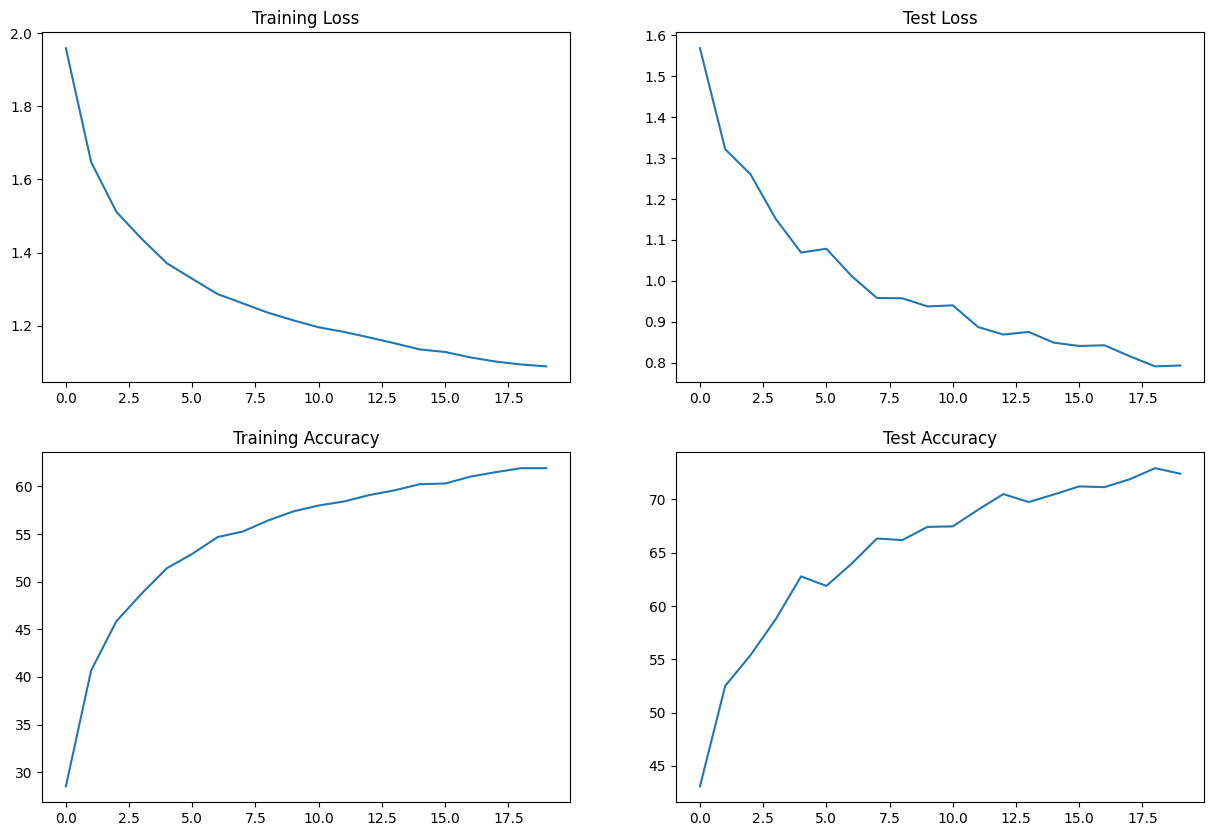

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

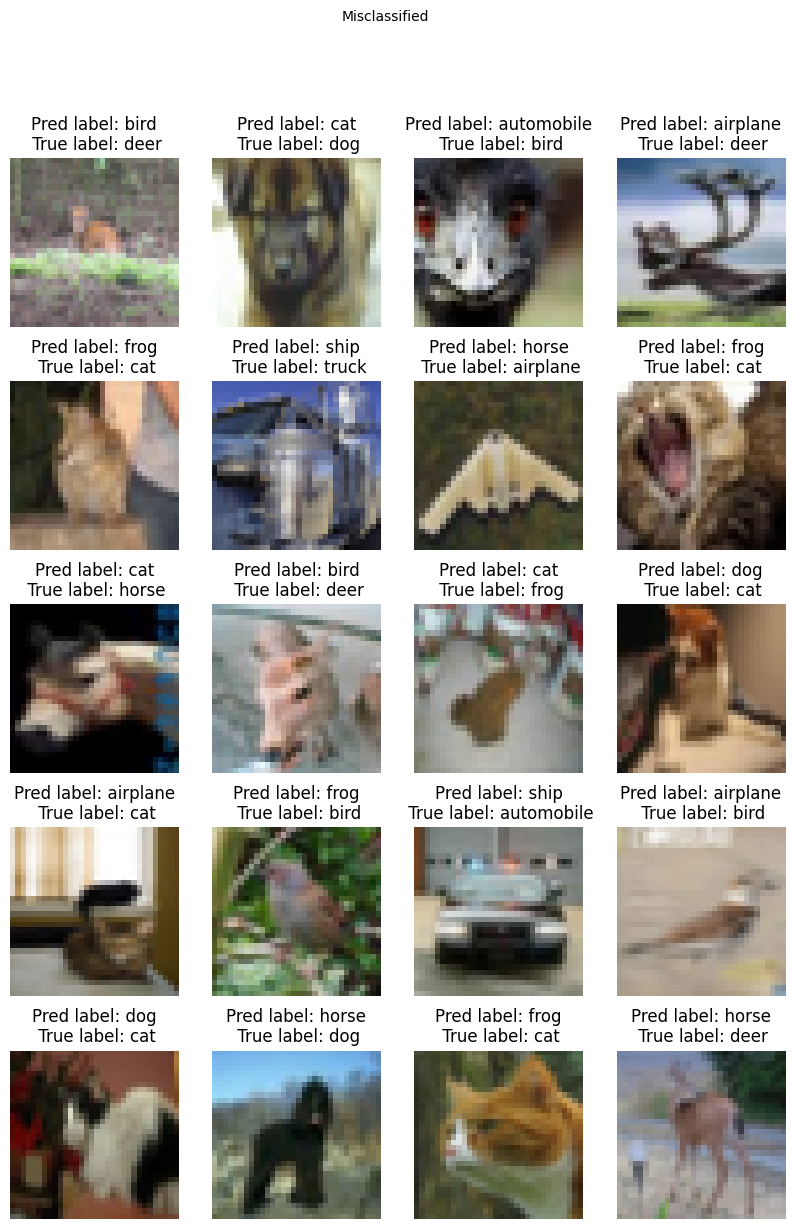

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 78 %

Accuracy of automobile : 90 %

Accuracy of  bird : 48 %

Accuracy of   cat : 46 %

Accuracy of  deer : 72 %

Accuracy of   dog : 55 %

Accuracy of  frog : 84 %

Accuracy of horse : 83 %

Accuracy of  ship : 87 %

Accuracy of truck : 82 %
{'airplane': 78.80794701986756, 'automobile': 90.63545150501672, 'bird': 48.80952380952381, 'cat': 46.753246753246756, 'deer': 72.27414330218069, 'dog': 55.91054313099041, 'frog': 84.21052631578948, 'horse': 83.33333333333333, 'ship': 87.61904761904762, 'truck': 82.5}


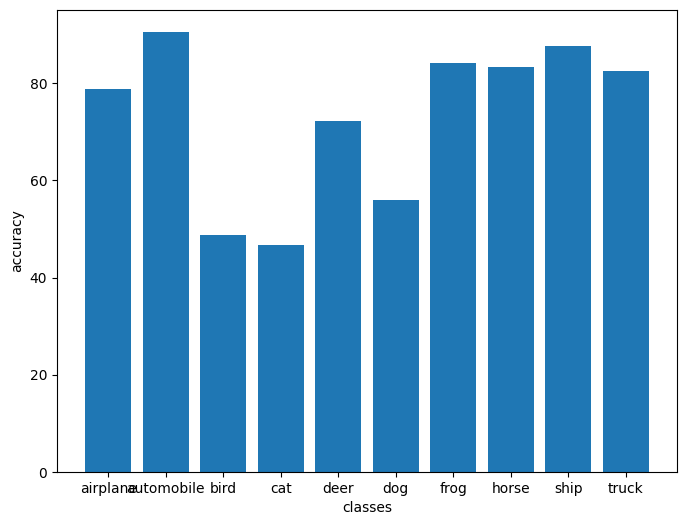

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)